In [2]:
from utils import *
import time
from handTracking import handDetector as hD

In [22]:
# rMean, bMean, gMean =  0.38, 0.41, 0.36
# varinaR, varinaG, varinaB = 0.15,0.15,0.15
rMean, bMean, gMean =  0.33, 0.41, 0.39
varinaR, varinaG, varinaB = 0.15,0.14,0.13
# 0.33 0.41 0.39 0.15 0.14 0.13
# t = 171
def getPixMap(img):
    
    varR = varinaR
    varG = varinaG
    varB = varinaB
    
    global bMean, rMean, gMean
#     bMean, gMean, rMean 
    b,g,r = cv2.split(img)
    
    summed = img.sum(axis=2)
    print(rMean,bMean,gMean, varinaR, varinaG, varinaB,)
    bM = np.divide(b, summed,dtype='float32')
    gM = np.divide(g, summed,dtype='float32')
    rM = np.divide(r, summed,dtype='float32')
    
    skinProb = 1/(2*np.pi * varR**0.5 * varG**0.5) * np.exp(
        -(
            (rM - rMean)**2 / (2*varR) + 
            (gM - gMean)**2 / (2*varG) +
            (bM - bMean)**2 / (2*varB)
        )
    )
        
    return skinProb, cv2.merge([bM,gM,rM])


In [19]:
def on_change_red(value):
    global rMean
    rMean = value/100
def on_change_green(value):
    global gMean
    gMean = value/100
def on_change_blue(value):
    global bMean
    bMean = value/100
    
    
def on_change_r_var(value):
    global varinaR
    varinaR = value/100
def on_change_g_var(value):
    global varinaG
    varinaG = value/100
def on_change_b_var(value):
    global varinaB
    varinaB = value/100
    
t = 171
    
def on_change_thresh(value):
    global t
    t = value

In [26]:
# cv2.namedWindow("Frame")
# cv2.namedWindow("Frame_2")

# cv2. resizeWindow("Frame",(480,360))
# cv2. resizeWindow("Frame_2",(480,360))

# cv2.createTrackbar('Red', "Frame", int(100*rMean), 100, on_change_red)
# cv2.createTrackbar('Green', "Frame", int(100*gMean), 100, on_change_green)
# cv2.createTrackbar('Blue', "Frame", int(100*bMean), 100, on_change_blue)
# cv2.createTrackbar('var_r', "Frame", int(100*varinaR), 100, on_change_r_var)
# cv2.createTrackbar('var_g', "Frame", int(100*varinaG), 100, on_change_g_var)
# cv2.createTrackbar('var_b', "Frame", int(100*varinaB), 100, on_change_b_var)
# cv2.createTrackbar('Thresh', "Frame", int(t), 254, on_change_thresh)

# # cap = cv2.VideoCapture("./hand_washing_ds/HandWashDataset/HandWashDataset/Step_1/HandWash_012_A_01_G03.mp4")
# # ret, frame = cap.read()
# # cap.release()
# # frame = cv2.imread("./sampleImage.jpg")

# frame = cv2.imread("./sampleImage.jpg")
# frame = greyWorld(frame)


# while True:
# #     ret, frame = cap.read()
# #     if not ret:
# #         break
    
    
#     cv2.imshow("Frame", frame)
    
#     f, i = getPixMap(frame)
#     f = np.uint8(255*f)
    
#     ret, thresh = cv2.threshold(f,t,255, cv2.THRESH_BINARY)
#     cv2.imshow("Frame_2", thresh)
    
#     k = cv2.waitKey(120) & 0xff
    
#     if k ==27:
#         break

# # cap.release()
# cv2.destroyAllWindows()

0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 0.39 0.15 0.14 0.13
0.33 0.41 

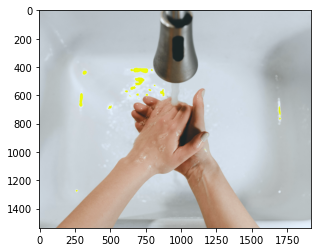

In [30]:
sam = cv2.imread("./sampleImage.jpg")
sam = greyWorld(sam)
displayPlt(sam)

In [36]:
pMap , im = getPixMap(sam)
pMap = np.uint8(255*pMap)

0.33 0.41 0.39 0.15 0.14 0.13


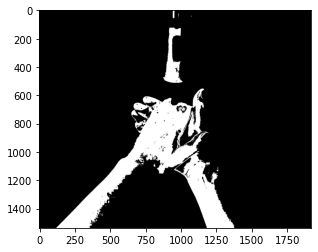

In [39]:
ret, thresh = cv2.threshold(pMap,t,255, cv2.THRESH_BINARY)
displayPlt(thresh)